In [3]:
import inspect
import os
import random
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_log(log_file,new_log_file,key_word):
    with open(log_file,  encoding='utf-16', mode = 'r') as f:
        with open(new_log_file, 'w') as train_log:
            for line in f:
                if 'Syncing' in line:
                    continue
                if 'nan' in line:
                    continue
                if key_word in line:
                    train_log.write(line)
    f.close()
    train_log.close()

In [ ]:
extract_log('train_yolov3_fine_tuning.log','train_log_loss.txt','images')
extract_log('train_yolov3_fine_tuning.log','train_log_iou.txt','IOU')

In [7]:
count = len(open('faster_loss.txt').readlines())
print(count)

40


In [26]:
with open('train_log_loss.txt', 'r') as file :
    filedata = file.read()
# Replace the target string
filedata = filedata.replace(':', ',')
# Write the file out again
with open('file.txt', 'w') as file:
    file.write(filedata)

In [48]:
lines = open('file.txt').readlines()
open('newfile.txt', 'w').writelines(lines[250:-6000])

total = 1148

start = 200, end = 10990



Text(0.5,0,'batches')

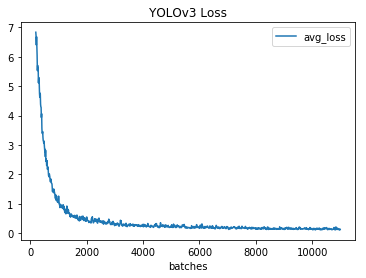

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
lines = 17000
start_ite = 200
end_ite = 11000 
step = 10
igore = 0 
    
data_path =  'newfile.txt'
# result_path = 'avg_loss' 

names = ['number','loss', 'avg', 'rate', 'seconds', 'images']
result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x<lines*1.0/((end_ite - start_ite)*1.0)*igore or x%step!=9)], error_bad_lines=False, names=names)
result.head()
for name in names:
    result[name] = result[name].astype(str).str.split(' ').str.get(1)
    
result.head()
result.tail()
 
for name in names:
    result[name] = pd.to_numeric(result[name])
result.dtypes
# print(result['avg'].values)
 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x_num = len(result['avg'].values)
tmp = (end_ite-start_ite - igore)/(x_num*1.0)
x = []
for i in range(x_num):
    x.append(i*tmp + start_ite + igore)
#print(x)
print('total = %d\n' %x_num)
print('start = %d, end = %d\n' %(x[0], x[-1]))
 
ax.plot(x, result['avg'].values, label='avg_loss')
#ax.plot(result['loss'].values, label='loss')
# plt.grid()
ax.legend(loc = 'best')
ax.set_title('YOLOv3 Loss')
ax.set_xlabel('batches')
# fig.savefig(result_path)
#fig.savefig('loss')

In [ ]:
with open('train_log_iou.txt', 'r') as file :
    filedata = file.read()
# Replace the target string
filedata = filedata.replace(':', ',')
# Write the file out again
with open('ioufile.txt', 'w') as file:
    file.write(filedata)

total = 7230

start = 0, end = 50193



Text(0.5,0,'batches')

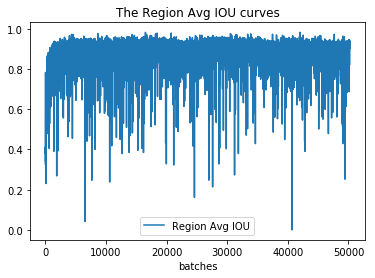

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
lines = 620000
step = 1000
start_ite = 0
end_ite = 50200
igore = 0
data_path =  'train_log_iou.txt' 
# result_path = 'Region Avg IOU' 
 
names = ['Region Avg IOU', 'Class', 'Obj', 'No Obj', '.5_Recall', '.7_Recall', 'count']
#result = pd.read_csv('log_iou.txt', skiprows=[x for x in range(lines) if (x%10==0 or x%10==9)]\
result = pd.read_csv(data_path, skiprows=[x for x in range(lines) if (x<lines*1.0/((end_ite - start_ite)*1.0)*igore or x%step!=0)]\
, error_bad_lines=False, names=names)
result.head()
 
for name in names:
    result[name] = result[name].str.split(': ').str.get(1)
result.head()
result.tail()
for name in names:
    result[name] = pd.to_numeric(result[name])
result.dtypes
 
x_num = len(result['Region Avg IOU'].values)
tmp = (end_ite-start_ite - igore)/(x_num*1.0)
x = []
for i in range(x_num):
    x.append(i*tmp + start_ite + igore)
#print(x)
print('total = %d\n' %x_num)
print('start = %d, end = %d\n' %(x[0], x[-1]))
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, result['Region Avg IOU'].values, label='Region Avg IOU')
#ax.plot(result['Avg Recall'].values, label='Avg Recall')
# plt.grid()
ax.legend(loc='best')
ax.set_title('The Region Avg IOU curves')
ax.set_xlabel('batches')
# fig.savefig(result_path)

In [5]:
def extract_log_(log_file,new_log_file,key_word):
    with open(log_file,  encoding='utf-8', mode = 'r') as f:
        with open(new_log_file, 'w') as train_log:
            for line in f:
                if 'Syncing' in line:
                    continue
                if 'nan' in line:
                    continue
                if key_word in line:
                    train_log.write(line)
    f.close()
    train_log.close()

In [6]:
extract_log_('log1.txt','faster_loss.txt','loss')

In [10]:
names = ['loss', 'lr']
result = pd.read_csv('faster_loss.txt',error_bad_lines=False, names=names)
result.head()

,loss,lr
0,[session 1][epoch 1][iter 0/ 140] loss: 3....,lr: 4.00e-03
1,[session 1][epoch 1][iter 100/ 140] loss: 1....,lr: 4.00e-03
2,[session 1][epoch 2][iter 0/ 140] loss: 1....,lr: 4.00e-03
3,[session 1][epoch 2][iter 100/ 140] loss: 1....,lr: 4.00e-03
4,[session 1][epoch 3][iter 0/ 140] loss: 1....,lr: 4.00e-03


In [11]:
for name in names:
    result[name] = result[name].str.split(': ').str.get(1)
result.head()

,loss,lr
0,3.4631,4.00e-03
1,1.4433,4.00e-03
2,1.0637,4.00e-03
3,1.0997,4.00e-03
4,1.1379,4.00e-03


In [13]:
for name in names:
    result[name] = pd.to_numeric(result[name])
result.dtypes

loss    float64
lr      float64
dtype: object

Text(0.5,0,'epoches')

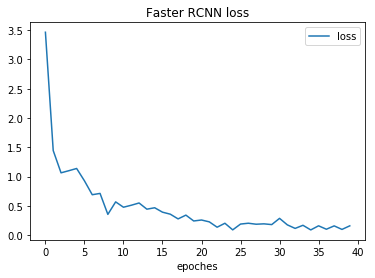

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(result['loss'].values, label='loss')
#ax.plot(result['Avg Recall'].values, label='Avg Recall')
# plt.grid()
ax.legend(loc='best')
ax.set_title('Faster RCNN loss')
ax.set_xlabel('epoches')